# Predication Classfication Analysis on Stroke dataset:

## Introduction

**Relevant background information**
<br/>
The topic we will explore is about factors that may cause a stroke. We choose this topic because according to World Health Organization (WHO), stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. Every year, this number increases dramatically, especially among people over the age of 70. However,  a lot of strokes are avoidable, so we'll explore what symptoms a patient has when they mean they're at high risk for stroke.


**Question we try to answer with your project:**
<br/>
Type of question we will answer: **predictive**
<br/>
Can we use the stroke dataset measurements to predict whether a future patient, with unknown diagnosis, is likely to have a stroke?
<br/>

**Identify and describe the dataset that will be used to answer the question**
<br/>
The dataset is called Stroke Prediction Dataset. It contains medical patients' information including gender, age, martial status, previous heart complications, work type and more. However, we are mainly interested in finding only couple factors that we think are important in considering whether they have an impact on the patient's likelyhood for a stroke. For that reason, we think that it would be  relevant to choose patient information relating to their *age*, *average glucose level* and *BMI*. 

## Exploratory Data Analysis

 **We will first load in the necessary libraries for the exploratory data analysis:**

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
options(readr.show_col_types = FALSE)
options(repr.matrix.max.rows = 6)
install.packages('themis')
library(themis)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

**We will set the seed and load in the data from the original source from the web:** 

In [2]:
set.seed(1)
download.file("https://raw.githubusercontent.com/Hannahli6/dsci_project/main/stroke_dataset.csv", 'stroke_dataset.csv')
stroke_data <- read_csv('stroke_dataset.csv')
stroke_data

id    gender age hypertension heart_disease ever_married work_type    
1     9046 Male   67  0            1             Yes          Private      
2    51676 Female 61  0            0             Yes          Self-employed
3    31112 Male   80  0            1             Yes          Private      
⋮    ⋮     ⋮      ⋮   ⋮            ⋮             ⋮            ⋮            
5108 19723 Female 35  0            0             Yes          Self-employed
5109 37544 Male   51  0            0             Yes          Private      
5110 44679 Female 44  0            0             Yes          Govt_job     
     Residence_type avg_glucose_level bmi  smoking_status  stroke
1    Urban          228.69            36.6 formerly smoked 1     
2    Rural          202.21            N/A  never smoked    1     
3    Rural          105.92            32.5 never smoked    1     
⋮    ⋮              ⋮                 ⋮    ⋮               ⋮     
5108 Rural           82.99            30.6 never smoked    0     
5109 Rural          166.29            25.6 formerly smoked 0     
5110 Urban           85.28            26.2 Unknown         0

### **Data wrangling & Cleaning to a format for exploratory data analysis:**
- We will convert 1 = "Yes", 0 = "No" for the stroke column, for clearer format
- As discussed before, we decided to mainly focus on the relation with factors : Age, Average glucose level and BMI.

In [12]:
stroke_column <- stroke_data |>
            mutate(stroke = as.character(stroke)) |>
            select(stroke) 
stroke_column[stroke_column == 1] <- "Yes"
stroke_column[stroke_column == 0] <- "No"

stroke_data["stroke"] <- stroke_column |>
        mutate(stroke = as_factor(stroke))

stroke_data <- stroke_data |>
    select(stroke, age, avg_glucose_level, bmi)
stroke_data

stroke age avg_glucose_level bmi 
1    Yes    67  228.69            36.6
2    Yes    61  202.21            N/A 
3    Yes    80  105.92            32.5
⋮    ⋮      ⋮   ⋮                 ⋮   
5108 No     35   82.99            30.6
5109 No     51  166.29            25.6
5110 No     44   85.28            26.2

**We will split the data into training and testing data**

In [13]:
#Split the data into training
stroke_data_split <- initial_split(stroke_data, prop = 0.75, strata = stroke)  
stroke_data_training <- training(stroke_data_split)  
stroke_data_testing <- testing(stroke_data_split)

### **Missing data:**
- only the BMI column has missing data
- here, we counted the number of missing data

In [14]:
#missing data
stroke_data_missing <- stroke_data_training|>
    filter(bmi == "N/A") |>
    summarize(missing_data = n())
stroke_data_missing

missing_data
1 155

### **Summarise Exploratory Data:**
1. filtered out the missing information from the BMI column
2. Changed BMI to numeric
3. We used group by and summarise to find the how many patient had stroke, their average age, average glucose level and average BMI in comparison to patient that never had a stroke

In [15]:
#summarize exploratory data
num_obs <- nrow(stroke_data_training) 
summarize_data <- stroke_data_training|>
    filter(bmi != "N/A")|>
    mutate(bmi = as.numeric(bmi)) |>
    group_by(stroke) |>
    summarize(count = n(), percentage = n() / num_obs * 100 , avg_age = mean(age), avg_glucose_level= mean(avg_glucose_level), 
              avg_bmi = mean(bmi))
    
summarize_data 

stroke count percentage avg_age  avg_glucose_level avg_bmi 
1 Yes     156   4.070981  68.65385 135.3220          30.66346
2 No     3521  91.884134  41.36439 103.4897          28.81366


### **Visualization of Exploratory Data:**

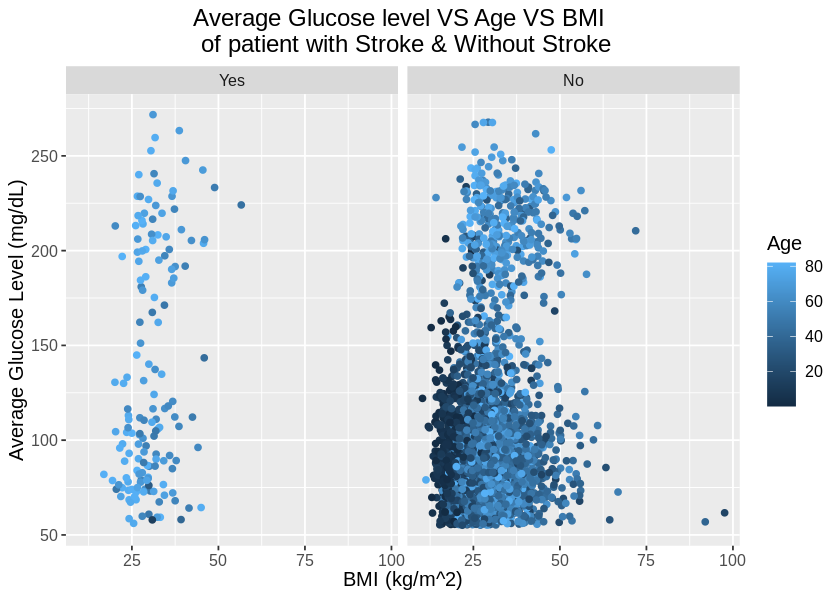

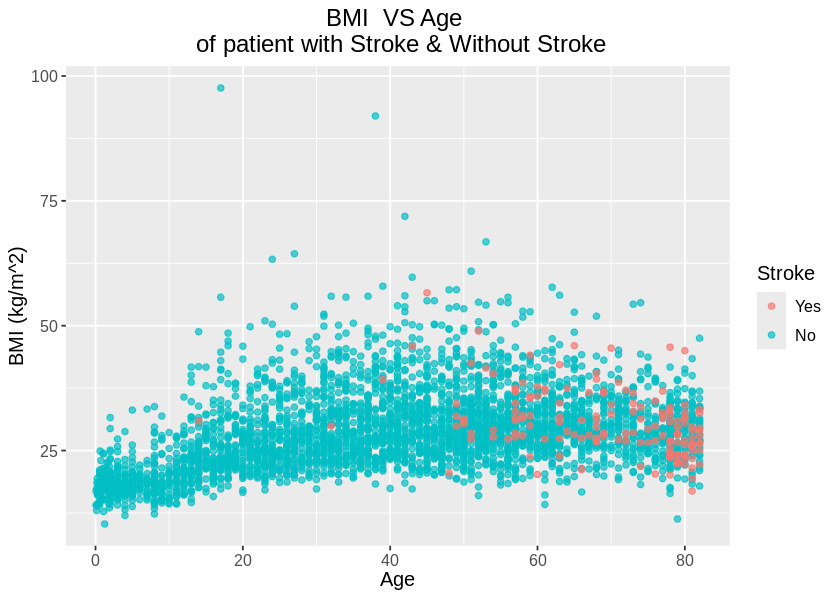

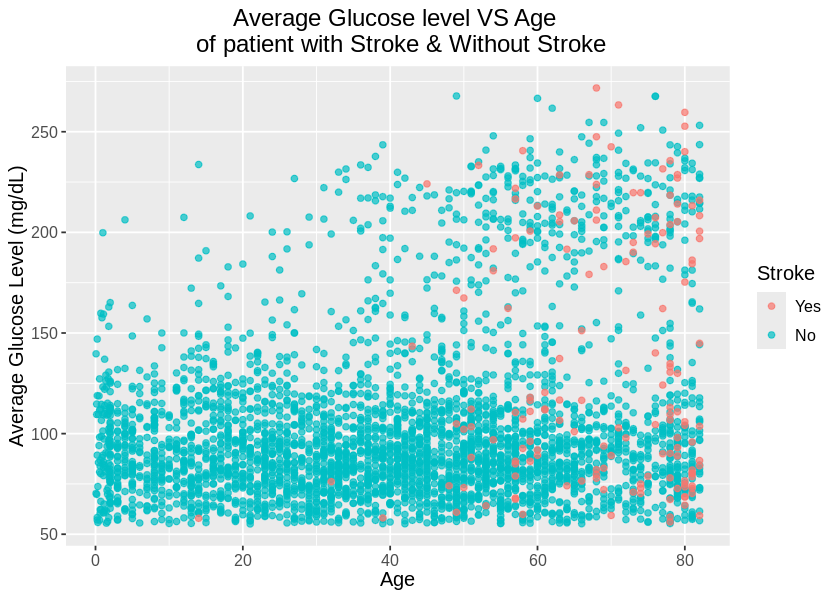

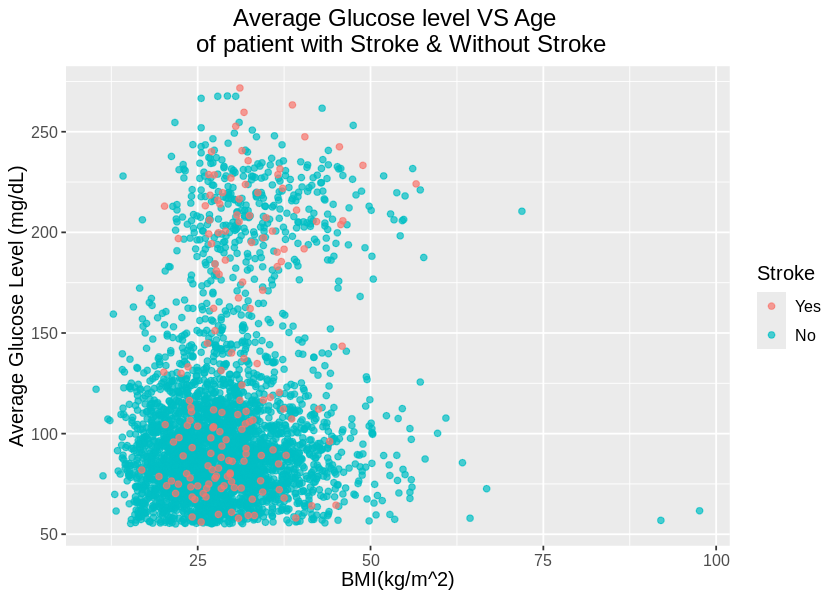

In [16]:
options(repr.plot.width=7, repr.plot.height=5)
#AVG GLUCOSE LEVEL VS BMI VS AGE
stroke_plot <- stroke_data_training |>
    filter(bmi != "N/A")|>
    mutate(bmi = as.numeric(bmi)) |>
    ggplot(aes (x= bmi, y=avg_glucose_level, color= age)) +
    facet_grid(~stroke) +
    geom_point() +
    labs(x= "BMI (kg/m^2)", y = "Average Glucose Level (mg/dL)", colour = "Age" ,title = "Average Glucose level VS Age VS BMI \n of patient with Stroke & Without Stroke") +
    theme(text = element_text(size = 12)) +
    theme(plot.title = element_text(hjust = 0.5))
stroke_plot

#BMI VS AGE
stroke_plot1 <- stroke_data_training |>
    filter(bmi != "N/A")|>
    mutate(bmi = as.numeric(bmi)) |>
    arrange(desc(stroke)) |>
    ggplot(aes (x= age, y=bmi, colour = stroke)) +
    geom_point(alpha = 0.7) +
    labs(x= "Age", y = "BMI (kg/m^2)", colour = "Stroke",title = "BMI  VS Age \n of patient with Stroke & Without Stroke") +
    theme(text = element_text(size = 12)) +
    theme(plot.title = element_text(hjust = 0.5))
stroke_plot1

#AVG GLUCOSE LEVEL VS AGE
stroke_plot2 <- stroke_data_training |>
    filter(bmi != "N/A")|>
    mutate(bmi = as.numeric(bmi)) |>
    arrange(desc(stroke)) |>
    ggplot(aes (x= age, y=avg_glucose_level, color= stroke)) +
    geom_point(alpha = 0.7) +
    labs(x= "Age", y = "Average Glucose Level (mg/dL)", colour = "Stroke" ,title = "Average Glucose level VS Age \n of patient with Stroke & Without Stroke") +
    theme(text = element_text(size = 12)) +
    theme(plot.title = element_text(hjust = 0.5))
stroke_plot2

#AVG GLUCOSE LEVEL vs BMI
stroke_plot3 <- stroke_data_training |>
    filter(bmi != "N/A")|>
    mutate(bmi = as.numeric(bmi)) |>
    arrange(desc(stroke)) |>
    ggplot(aes (x= bmi, y=avg_glucose_level, color= stroke)) +
    geom_point(alpha = 0.7) +
    labs(x= "BMI(kg/m^2)", y = "Average Glucose Level (mg/dL)", colour = "Stroke" ,title = "Average Glucose level VS Age \n of patient with Stroke & Without Stroke") +
    theme(text = element_text(size = 12)) +
    theme(plot.title = element_text(hjust = 0.5))
stroke_plot3




**Based on the visualization:**
<br/>
... add why ... What is the relationship? ... 
what information you see from your EDA, and how this informs your future decisions/conclusions is needed. For example, are the classes balanced? Are you going to use these variables in the model because of the EDA relationships you can see? 
<br/>

The scatter plot suggested we are expected to find a relationship between age, average glucose level, and the likelihood of having a stroke. And the anticipation is that elder people with higher average glucose levels are more likely to have a stroke.

**Expected outcome:** 
- use feedback from TA to rewrite this part
- ...
- What do you expect to find? based on the result of the exploratory data?

The scatter plot suggested we are expected to find that there is a relationship between age, average glucose level, and the likelihood of having a stroke. And the anticipation is that elder people with higher average glucose levels are more likely to have a stroke. ... sepcifically....


## **Data Anaylsis: Classification**

1. Find the best k
2. cross validation
    - graph for the best k
3. Tune spec & model
3. Compute metrics of performance by predicting labels on testing data only
4. confusion matrix or comparing test data vs classified and what it supposed to be

stroke age avg_glucose_level bmi 
1    Yes    67  228.69            36.6
2    Yes    80  105.92            32.5
3    Yes    49  171.23            34.4
⋮    ⋮      ⋮   ⋮                 ⋮   
3675 No     81  125.20            40.0
3676 No     35   82.99            30.6
3677 No     44   85.28            26.2

age avg_glucose_level bmi  stroke
1    80   73.54            24.0 Yes   
2    81  213.22            26.1 Yes   
3    73  219.73            28.6 Yes   
⋮    ⋮   ⋮                 ⋮    ⋮     
7040 81  125.20            40.0 No    
7041 35   82.99            30.6 No    
7042 44   85.28            26.2 No

stroke n   
1 Yes    3521
2 No     3521

neighbors .metric  .estimator mean      n std_err     .config              
1  1         accuracy binary     0.9735864 5 0.002149013 Preprocessor1_Model01
2  1         roc_auc  binary     0.9735864 5 0.002149013 Preprocessor1_Model01
3  2         accuracy binary     0.9735864 5 0.002149013 Preprocessor1_Model02
⋮  ⋮         ⋮        ⋮          ⋮         ⋮ ⋮           ⋮                    
38 19        roc_auc  binary     0.9409648 5 0.003227406 Preprocessor1_Model19
39 20        accuracy binary     0.8604074 5 0.005124801 Preprocessor1_Model20
40 20        roc_auc  binary     0.9348888 5 0.003352273 Preprocessor1_Model20

.pred_class stroke age avg_glucose_level bmi 
1    No          Yes    79  174.12            24.0
2    No          Yes    74   70.09            27.4
3    No          Yes    69   94.39            22.8
⋮    ⋮           ⋮      ⋮   ⋮                 ⋮   
1230 Yes         No     57   76.62            28.2
1231 No          No     13  103.08            18.6
1232 No          No     51  166.29            25.6

.metric  .estimator .estimate
1 accuracy binary     0.8944805

          Truth
Prediction  Yes   No
       Yes    7   84
       No    46 1095

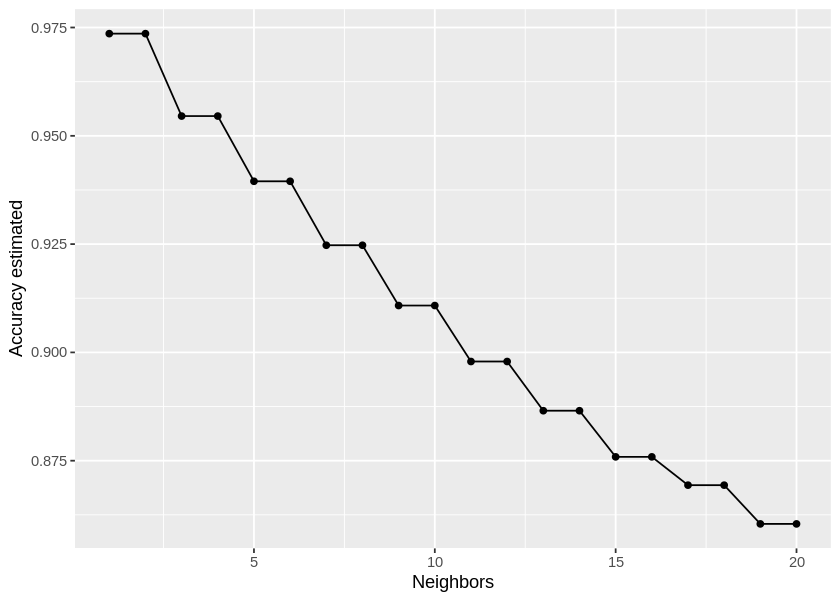

In [28]:
library(themis)
stroke_data_training
stroke_data_training <- stroke_data_training |>
                        filter(bmi != "N/A") |>
                        mutate(bmi = as.numeric(bmi))
stroke_data_testing <- stroke_data_testing |>
                        filter(bmi != "N/A") |>
                        mutate(bmi = as.numeric(bmi))
#try up sampling the data
ups_recipe <- recipe(stroke ~ age + avg_glucose_level + bmi , data = stroke_data_training) |>
    step_upsample(stroke, over_ratio = 1, skip = FALSE) |>
    prep()
upsampled_stroke <- bake(ups_recipe, stroke_data_training)
upsampled_stroke

upsampled_stroke |>
  group_by(stroke) |>
  summarize(n = n())

# step 1: create a recipe for stroke dataset, we will use bmi,average glucose level and age as predictors 
# and whether has stroke or not as predicted class.
# stroke_recipe <- recipe(stroke ~ age + avg_glucose_level + bmi, data = stroke_data_training) |>
#                  step_scale(all_predictors()) |>
#                  step_center(all_predictors())

stroke_recipe <- recipe(stroke ~ age + avg_glucose_level + bmi, data = upsampled_stroke) |>
                 step_scale(all_predictors()) |>
                 step_center(all_predictors()) 

#step 2: create the knn model.
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# step 3: Perform a 5-fold cross-validation on the training set.
stroke_vfold <- vfold_cv(upsampled_stroke, v = 5, strata = stroke)

#step 4: create a table that has the value of k we would like to tune. We set the range from 1 to 50, with one by one.
k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1 ))

#step 5: create a workflow for our data analysis.
knn_results <- workflow() |>
               add_recipe(stroke_recipe) |>
               add_model(knn_spec) |>
               tune_grid(resamples = stroke_vfold, grid = k_vals) |>
               collect_metrics()
knn_results           
accuracies <- knn_results |>
              filter(.metric == "accuracy")

cross_val_plot <- accuracies |>
                  ggplot(aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = "Neighbors",
                       y = "Accuracy estimated")

cross_val_plot
#step6: using the best k to tune the model
knn_tune_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
            set_engine("kknn") |>
            set_mode("classification")
#step7: fit the tuned spec into workflow
knn_tune_fit <- workflow() |>
  add_recipe(stroke_recipe) |>
  add_model(knn_tune_spec) |>
  fit(data = upsampled_stroke)
#step8:
mnist_predictions <- predict(knn_tune_fit , stroke_data_testing) |>
      bind_cols(stroke_data_testing)
mnist_predictions

mnist_metrics <- mnist_predictions |>
        metrics(truth = stroke, estimate = .pred_class) |>
        filter(.metric == "accuracy")
mnist_metrics

mnist_conf_mat <- mnist_predictions |> 
      conf_mat(truth = stroke, estimate = .pred_class)
mnist_conf_mat



### **Discussion:**
- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

## **References:**
- list